In [1]:
import numpy as np
import pandas as pd
from neupy import algorithms
from sklearn import decomposition
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
zip_train = pd.read_csv("Zip_codes/zip_train.csv", header=None, sep=" ")
zip_test = pd.read_csv("Zip_codes/zip_test.csv", header=None, sep=" ")
zip_train=zip_train.drop([257], axis=1)

In [3]:
zip_train

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.000,-1.000,-1.000,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
5,6.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.397,0.983,-0.535,-1.000,...,0.803,0.015,-0.862,-0.871,-0.437,-1.000,-1.000,-1.000,-1.000,-1.0
6,3.0,-1.000,-1.000,-1.000,-0.830,0.442,1.000,1.000,0.479,-0.328,...,1.000,0.671,0.345,-0.507,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7,1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.510,-0.213,...,-0.654,0.666,0.301,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
8,0.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.454,0.879,-0.745,-1.000,...,1.000,1.000,1.000,0.506,-0.174,-0.811,-1.000,-1.000,-1.000,-1.0
9,1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.909,0.801,...,-1.000,-0.332,0.735,0.380,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [4]:
zip_train.isna().sum().sum()

0

In [5]:
zip_test.isna().sum().sum()

0

In [6]:
y_train = zip_train.iloc[:,0].values.astype(np.int)
x_train = (zip_train.iloc[:,1:257].values > 0).astype(np.int)

y_test = zip_test.iloc[:,0].values.astype(np.int)
x_test = (zip_test.iloc[:,1:257].values > 0).astype(np.int)

matrix_x_train = [pos.reshape(16,16) for pos in x_train]          
matrix_x_test  = [pos.reshape(16,16) for pos in x_test]           
new_data = list(zip(matrix_x_train, y_train))

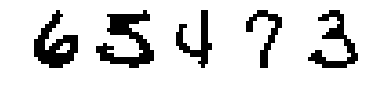

In [7]:
i = 1
for index in range(5):
    plt.subplot(1, 5, i)
    number = matrix_x_train[index]
    plt.axis('off')
    plt.imshow(number, cmap=plt.cm.gray_r, interpolation='nearest')
    i +=1

In [8]:
#pca_train = decomposition.PCA(n_components=2)
#pca_train.fit(x_train)
#x_train = pca_train.transform(x_train)

In [9]:
n_inputs = len(x_train[0])

In [19]:
sofm = algorithms.SOFM(
    n_inputs=n_inputs,
    n_outputs=10,
    
    # With large number of training samples it's safer
    # to use small step (learning rate)
    step=0.05,
    shuffle_data=True,         # Shuffles dataset before every training epoch.
    weight='sample_from_data',

    learning_radius=0,
    
    # after 10 iteration learning radius would be 0
    #reduce_radius_after=1,
    verbose=True,             # Shows training progress in terminal
    show_epoch = 10           # Shows verbose each N
)
sofm.train(x_train, epochs=2)


Main information

[ALGORITHM] SOFM

[OPTION] distance = ['euclid', 'neg_euclid_distance']
[OPTION] features_grid = None
[OPTION] grid_type = ['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid']
[OPTION] learning_radius = 0
[OPTION] n_inputs = 256
[OPTION] n_outputs = 10
[OPTION] reduce_radius_after = 100
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] show_epoch = 10
[OPTION] shuffle_data = True
[OPTION] signals = None
[OPTION] std = 1
[OPTION] step = 0.05
[OPTION] verbose = True
[OPTION] weight = sample_data



#1 : [2 sec] train: 0.247612
#2 : [2 sec] train: 0.248600


In [20]:
a = sofm.predict(x_train)

In [21]:
a.shape

(7291, 10)

In [22]:
y_test

array([9, 6, 3, ..., 4, 0, 1])

In [23]:
#pca_test = decomposition.PCA(n_components=2)
#pca_test.fit(x_test)
#x_test = pca_test.transform(x_test)

In [24]:
predicted = sofm.predict(x_test)
predicted = predicted.nonzero()[1]

In [25]:
predicted

array([2, 6, 2, ..., 2, 3, 2])


Información del clasificador SOFM SOFM(verbose=True, step=0.05, show_epoch=10, shuffle_data=True, signals=None, n_inputs=256, n_outputs=10, weight=(256, 10), features_grid=[10, 1], distance=['euclid', 'neg_euclid_distance'], grid_type=['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid'], learning_radius=0, std=1, reduce_radius_after=100, reduce_std_after=100, reduce_step_after=100):
             precision    recall  f1-score   support

          0       0.06      0.00      0.01       359
          1       0.04      0.01      0.02       264
          2       0.08      0.28      0.12       198
          3       0.11      0.34      0.17       166
          4       0.04      0.10      0.06       200
          5       0.01      0.01      0.01       160
          6       0.10      0.02      0.04       170
          7       0.00      0.00      0.00       147
          8       0.11      0.01      0.01       166
          9       0.06      0.01      0.01       177

av

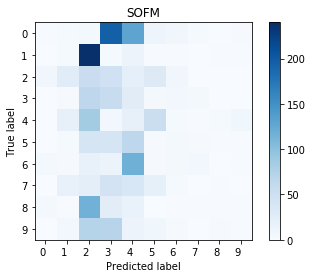

In [26]:
clr = (sofm, classification_report(y_test, predicted))
print("\nInformación del clasificador SOFM %s:\n%s\n\n" % clr)

cm = confusion_matrix(y_test, predicted)              
print("Confusion matrix:\n%s" % cm)

classes = ['0','1', '2','3','4','5','6','7','8','9']            
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, 
       yticklabels=classes,
       title="SOFM",
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor");

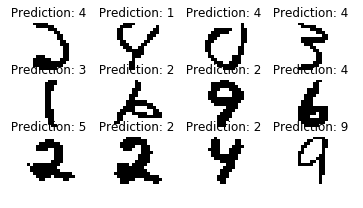

In [27]:
images_prediction = list(zip(matrix_x_test, predicted))
for index, (image, prediction) in enumerate(images_prediction[12:24]):
    plt.subplot(4, 4, index +1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(' Prediction: %i  ' % prediction)

plt.show()